# Практическая работа №3: Кластерный анализ

Выполнил студент гр. 0373 Черневич Константин. Вариант №21.

## Цель работы

Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения


*Кластерный анализ* - это задача разбиения заданной выборки объектов на подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались

*Основные задачи кластерного анализа*:

* Разработка типологии или классификации
* Исследование концептуальных схем группирования объектов
* Порождение гипотез на основании исследования данных
* Проверка исследования или гипотез, для определения действительно ли группы есть в иследующихся данных

*Основные цели кластерного анализа*:

* Получение информации о данных
* Сжатие данных
* Выделение идентичных объектов, которые определить ни к какому из имеющихся кластеров

*Требования для кластерного анализа*:

* Полнота
* Однородность

*Метрика* - неотрицательная вещественная функция $d(x,y)$, для которой справедливы следующие утверждения:

1. $d(x,y) \geq 0$
2. $d(x,y) = d(y,x)$
3. $d(x,y) \leq d(x,z) + d(z,y)$

Виды метрик: 

* Евклидово расстояние: $d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$
* Квадрат евклидова расстояния: $d(x,y) = \sum_{i=1}^{n}(x_i-y_i)^2$
* Обобщенное степенное расстояние Минковского: $d(x,y) = (\sum_{i=1}^{n}(x_i-y_i)^p)^{\frac{1}{p}}$
* Расстояние Чебышева: $d(x,y) = \max_{i=[1,n]}(x_i-y_i)$
* Манхэтонское расстояние: $d(x,y) = \sum_{i=1}^{n}|(x_i-y_i)|$

*Нормализация по методу мин-макс*: $X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}}$

Поиск *грубой* оценки верхнего колличества кластеров: $k = \sqrt{\frac{n}{2}}$

Алгоритм метода *k-means*:

1. Случайно выбираются k точек, являющиеся начальными центрами кластеров
2. Относим каждый объект к кластеру с ближайщим центроидом
3. Перестраиваем центроиды
4. Если критерий остановки неудовлетворен, то возвращаемся к пункту 2

Алгоритм метода *k-medians* - это версия k-means, где центр кластера определяется медианой а не средним. Метрикой берется Манхэтонское расстояние.

*Метод силэтов*: 

* Вычисляется коэффициент силуэта с помощью внутрикластерного расстояния (a) и среднего расстояния до ближайшего кластера (b) по каждому кластеру: $S_i = \frac{b_i-a_i}{\max(a_i;b_i)}$, где $a_i = \frac{1}{\#C_j-1}\sum_{x_j \in C_i}d(x_j,x_{C_j})$; $b_i = \min_{j \ne i}\frac{1}{\#C_j}\sum_{x_j \in C_j}d(x_j,x_{C_i})$
* Находится $S = \frac{1}{k}\sum_{i=1}^k S_i$
* Строится график зависимости S от k и по пику определяется нужное k

*Метод поиска исключений*: 

0. берется множество X и радиус R, $R_{min} \leq R \leq R_{max}$, где $R_{min} = \min \{d(x_i,x_j)>0\}$; $R_{max} = \max \{d(x_i,x_j)\}$
1. $U := X$ - множество необработанных точек
2. выбираем случайную $x_C \in U$ - центр первого кластера
3. Вокруг этой точки раздуваем гиперсферу с радиусом R; $K := {x \in U|d(x,x_C) \leq R}$
4. Перемещаем центр: $\overline{x_C} = \frac{1}{\# K}\sum_{x \in K}x$
5. Делаем проверку: if $x_C \ne \overline{x_C}$: then $x_C := \overline{x_C}$ and repeat пункт 3
6. $U:= \frac{U}{K}$ - исключаем из U все точки K
7. $K:= K \cup {x_C}$
8. if $\# U >0$: then repeat пункт 2 else end

Проверка чувствительности метода: 

1. Строим алгоритм
2. Берём $\overline{R}:=R+\epsilon$
3. смотрим как изменится кластеризация

## Постановка задачи

Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Были нормализированы множество точек из предыдущей практической работы 

In [185]:
import numpy as np

def normalize_points(points):
    points = np.array(points)
    mean = np.mean(points, axis=0)
    std = np.std(points, axis=0)
    return (points - mean) / std

# points = [(1, 2), (3, 4), (5, 6)]
# normalized_points = normalize_points(points)

# print(normalized_points)



In [186]:
beer=[17.5,8.8,32.7,23.3,23.8,1.8,18.7,18,27.8,
53.8,30,24.8,26.6,37.3,24.4,32,46.1,59.6,28.3,
55.5,39.9,30.5,38.4,50.1,40,43.2,27.9,77,55.7,
109,28.7,41.1,43.3,34.2,61.2,68.6,51,35.6,58.8,
50.3,39.7,72.5,28.2,45.6,81.8,41.8,34.4,67.2,
125.3,17.5,66.2,64.6,49.5,53,104.2,91.4,64.7,
15.7,118.3,67.2,67.4,86,68.8,46.3,39,50.1,52.4,
74.7,58.8,51,95.8,49.6,78.1,61.4,54.2,65.5,81.01,
56.93,79.01,57.03,66.51,39.06,89.7,62.9,71.4,64.6,
96.1,99.9,67.5,40.5,59.5,81.2,79.8,52,56.3,39,
55.5,86.2,39.5,81.2,72.9,47.3,84.3,42.2,42.1,
58.3,48,43.4,38]

vodka = [10.7,15.8,16.5,10.6,11.5,4.6,23.2,7.9,
9.7,16.4,16.4,9.1,17.3,20.7,11.3,14.8,10.5,15.4,
23.6,12.3,7.1,12.8,21.2,7.9,20.9,12.4,13.9,23.3,
16.8,31.9,8.5,10,17.4,12.9,14.8,21.2,11.9,8.6,
6.9,8.8,10.9,7.9,12.1,17.6,7.8,11,14,18.6,16.4,
3.8,17.8,18.1,7.9,18.9,8.2,13.3,11.3,3.9,14.9,
14.7,7.4,15.1,13.1,8.5,15.3,10.2,16.4,18.8,9.1,
5.5,14.9,14.7,10.7,9.4,13.4,14.8,8.41,10.79,
10.1,12.46,13.86,14.03,9.7,9.9,9.2,13.8,13.1,
14.1,11.4,8,9.1,16.3,6.8,9,7,8.8,8.8,10.2,5.7,
11.4,9.7,6.9,4.7,6.6,2.9,12.8,6.8,4.5,8.9]

points = [(x, y) for x, y in zip(beer, vodka)]

# Normalize the points
normalized_points = normalize_points(points)


print(normalized_points)
print(len(normalized_points))

[[-1.54697840e+00 -3.04458955e-01]
 [-1.91422868e+00  7.31652053e-01]
 [-9.05345721e-01  8.73863368e-01]
 [-1.30214488e+00 -3.24774857e-01]
 [-1.28103854e+00 -1.41931738e-01]
 [-2.20971741e+00 -1.54372898e+00]
 [-1.49632319e+00  2.23502881e+00]
 [-1.52587206e+00 -8.73304215e-01]
 [-1.11218783e+00 -5.07617976e-01]
 [-1.46582550e-02  8.53547466e-01]
 [-1.01931995e+00  8.53547466e-01]
 [-1.23882586e+00 -6.29513389e-01]
 [-1.16284305e+00  1.03639058e+00]
 [-7.11167411e-01  1.72713126e+00]
 [-1.25571093e+00 -1.82563542e-01]
 [-9.34894594e-01  5.28493032e-01]
 [-3.39695861e-01 -3.45090759e-01]
 [ 2.30175267e-01  6.50388445e-01]
 [-1.09108150e+00  2.31629242e+00]
 [ 5.71032944e-02  2.05954788e-02]
 [-6.01414453e-01 -1.03583143e+00]
 [-9.98213609e-01  1.22174989e-01]
 [-6.64733467e-01  1.82871077e+00]
 [-1.70845157e-01 -8.73304215e-01]
 [-5.97193185e-01  1.76776306e+00]
 [-4.62112622e-01  4.09113809e-02]
 [-1.10796657e+00  3.45649913e-01]
 [ 9.64675831e-01  2.25534471e+00]
 [ 6.55458297e-02  9

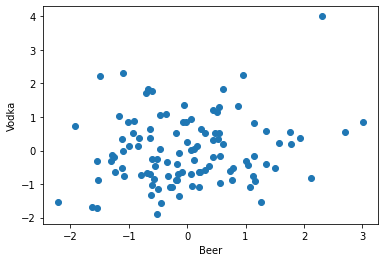

In [187]:
import matplotlib.pyplot as plt

# Normalize the points
normalized_points = normalize_points(points)

# Extract the x and y coordinates of the normalized points
x = [point[0] for point in normalized_points]
y = [point[1] for point in normalized_points]

# Create a scatter plot
plt.scatter(x, y)

# Add labels to the axes
plt.xlabel('Beer')
plt.ylabel('Vodka')

# Show the plot
plt.show()

Была определена "грубая" верхняя оценка колличества кластеров  

In [188]:
import math
k = math.floor(math.sqrt(109/2))
#print(k)

Верхняя оценка:  $\overline{k} = 7$

Был реализован алгоритм k-means. Отображены полученные кластеры, каждый кластер выделен разным цветом, центроиды отмечены звездочкой.


In [189]:
# Define the k-means function
# Import the necessary modules
import numpy as np
normalized_points = normalize_points(points)
# Define the number of clusters (k) and initialize the centroids randomly
#k = 3
centroids = np.random.rand(k, 2)

# Define a function to calculate the distance between a data point and a centroid
def distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

# Define a function to assign each data point to the closest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Define a function to update the centroids based on the data points assigned to them
def update_centroids(data, clusters, centroids):
    for i in range(len(centroids)):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis=0)
    return centroids

# Define a function to run the k-means algorithm
def k_means(data, k):
    centroids = np.random.rand(k, 2)
    clusters = None
    while not np.array_equal(clusters, assign_clusters(data, centroids)):
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, centroids)
    return centroids, clusters


In [126]:
#centroids, clusters = k_means(normalized_points, k)

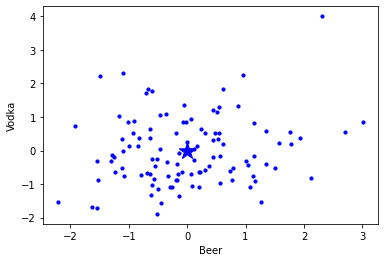

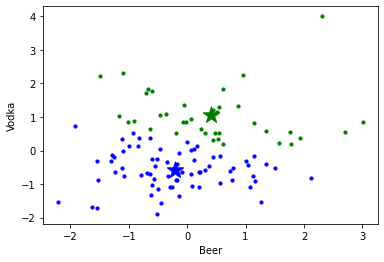

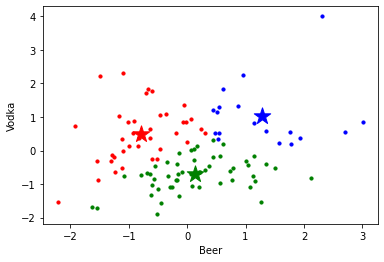

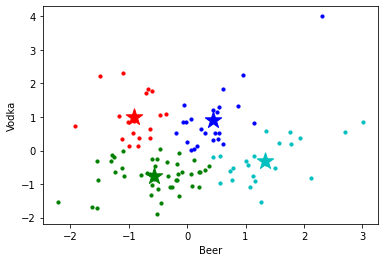

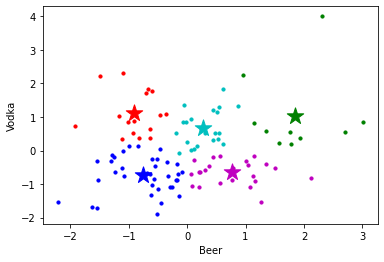

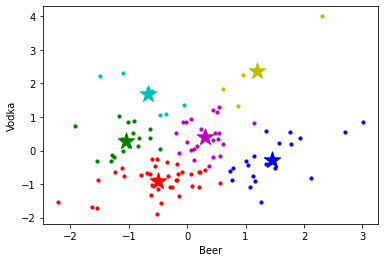

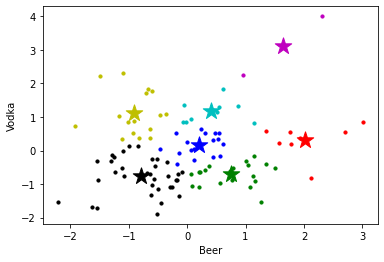

In [191]:
for num in range(1,k+1):  
    centroids, clusters = k_means(normalized_points, num)
    colors = ['b', 'g', 'r', 'c', 'm','y','k','w']
    # Extract the centroids
    #entroids = [np.mean(cluster, axis=0) for cluster in clusters]

    # Extract the x and y coordinates of the points in each cluster
    #x = [[point[0] for point in normalized_points] for cluster in clusters]
    #y = [[point[1] for point in normalized_points] for cluster in clusters]
    # Create a scatter plot for each cluster
    for i in range(len(clusters)):
        plt.scatter(normalized_points[i][0], normalized_points[i][1],c=colors[clusters[i]],s=10, label=f'Cluster {clusters[i]}')

    # Plot the centroids as asterisks
    [plt.scatter(centroids[i][0], centroids[i][1], marker='*', c=colors[i], s=300) for i in range(len(centroids))]

    # Add labels to the axes
    plt.xlabel('Beer')
    plt.ylabel('Vodka')

    # Add a legend
    #plt.legend()

    # Show the plot
    plt.show()

Для метода k-means была построена таблица с центроидами и мощностями кластеров для всех k от 1 до $\overline{k}$

In [129]:
k_tab = []
for j in range(1,k+1):
    centroids, clusters = k_means(normalized_points, j)

    # Extract the x and y coordinates of the points in each cluster
    k_means_values = []
    # Create a scatter plot for each cluster
    #print('j = ',j)
    for i in range(1,k+1):
        k_means_values.append(len([1 for j in clusters if j==(i-1)]))
    #print()
    k_tab.append([j,centroids,k_means_values])
#print(k_tab)

j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7


In [130]:
import pandas as pd
k_means_table = pd.DataFrame({'Значение k':[k_tab[i][0] for i in range(len(k_tab))],
                             'Центроиды кластера $x_{C_i}$':[str([[round(k_tab[i][1][j][0],2),round(k_tab[i][1][j][1],2)] for j in range(len(k_tab[i][1]))]) for i in range(len(k_tab))],
                             'Объём кластера #$C_i$':[k_tab[i][2] for i in range(len(k_tab))]},index=[''*i for i in range(len(k_tab))])
k_means_table

,Значение k,Центроиды кластера $x_{C_i}$,Объём кластера #$C_i$
,1,"[[0.0, 0.0]]","[109, 0, 0, 0, 0, 0, 0]"
,2,"[[-0.61, -0.19], [1.01, 0.32]]","[68, 41, 0, 0, 0, 0, 0]"
,3,"[[-1.0, 0.2], [0.27, -0.69], [0.94, 0.93]]","[37, 46, 26, 0, 0, 0, 0]"
,4,"[[-0.61, -0.71], [1.05, -0.13], [0.89, 1.87], ...","[45, 34, 7, 23, 0, 0, 0]"
,5,"[[-0.63, -0.72], [-0.91, 1.11], [0.4, 0.77], [...","[44, 16, 24, 22, 3, 0, 0]"
,6,"[[-1.01, 0.31], [-0.64, -0.95], [0.41, -0.19],...","[18, 30, 28, 15, 2, 16, 0]"
,7,"[[-0.16, -0.89], [-1.09, -0.54], [1.3, 2.7], [...","[24, 21, 3, 14, 23, 7, 17]"


Был реализован алгоритм k-medians. Отображены полученные кластеры, каждый кластер выделен разным цветом, центроиды отмечены звездочкой.

In [192]:
import math
k = math.floor(math.sqrt(109/2))
#print(k)

In [193]:
# Define the k-means function
# Import the necessary modules
import numpy as np
normalized_points = normalize_points(points)
# Define the number of clusters (k) and initialize the centroids randomly
#k = 3
centroids = np.random.rand(k, 2)

# Define a function to calculate the distance between a data point and a centroid
def distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

# Define a function to assign each data point to the closest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Define a function to update the centroids based on the data points assigned to them
def update_centroids(data, clusters, centroids):
    for i in range(len(centroids)):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.median(points, axis=0)
    return centroids

# Define a function to run the k-means algorithm
def k_medians(data, k):
    centroids = np.random.rand(k, 2)
    clusters = None
    while not np.array_equal(clusters, assign_clusters(data, centroids)):
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, centroids)
    return centroids, clusters


In [134]:
centroids, clusters = k_medians(normalized_points, k)

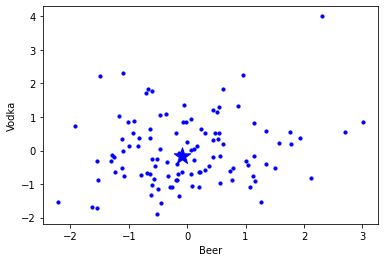

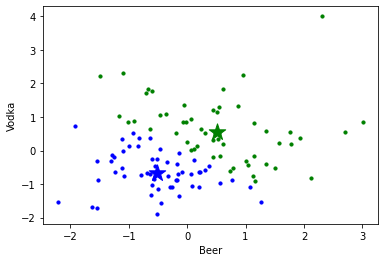

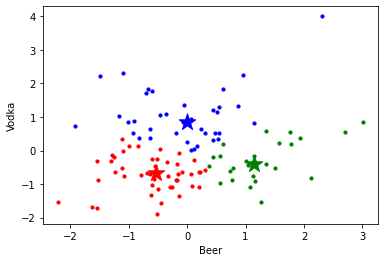

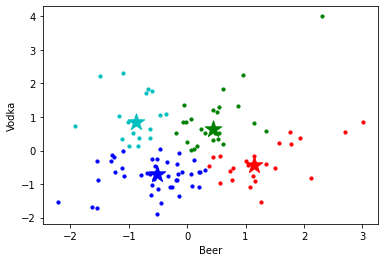

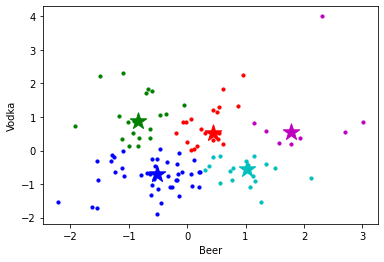

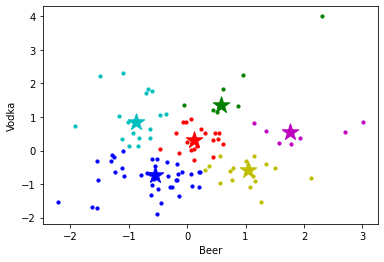

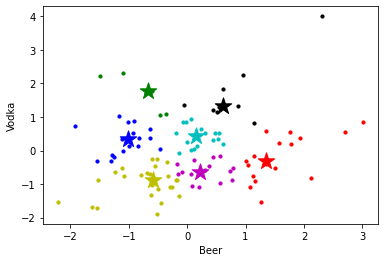

In [197]:
for num in range(1,k+1):
    centroids, clusters = k_medians(normalized_points, num)
    colors = ['b', 'g', 'r', 'c', 'm','y','k','w']
    # Extract the centroids
    #entroids = [np.mean(cluster, axis=0) for cluster in clusters]

    # Extract the x and y coordinates of the points in each cluster
    #x = [[point[0] for point in normalized_points] for cluster in clusters]
    #y = [[point[1] for point in normalized_points] for cluster in clusters]
    # Create a scatter plot for each cluster
    for i in range(len(clusters)):
        plt.scatter(normalized_points[i][0], normalized_points[i][1],c=colors[clusters[i]],s=10, label=f'Cluster {clusters[i]}')

    # Plot the centroids as asterisks
    [plt.scatter(centroids[i][0], centroids[i][1], marker='*', c=colors[i], s=300) for i in range(len(centroids))]

    # Add labels to the axes
    plt.xlabel('Beer')
    plt.ylabel('Vodka')

    # Add a legend
    #plt.legend()

    # Show the plot
    plt.show()

Для метода k-medians была построена таблица с центроидами и мощностями кластеров для всех k от 1 до $\overline{k}$

In [136]:
k_tab = []
for j in range(1,k+1):
    centroids, clusters = k_medians(normalized_points, j)

    # Extract the x and y coordinates of the points in each cluster
    k_medians_values = []
    # Create a scatter plot for each cluster
    #print('j = ',j)
    for i in range(1,k+1):
        k_medians_values.append(len([1 for j in clusters if j==(i-1)]))
    #print()
    k_tab.append([j,centroids,k_medians_values])
#print(k_tab)

In [137]:
import pandas as pd
k_medians_table = pd.DataFrame({'Значение k':[k_tab[i][0] for i in range(len(k_tab))],
                             'Центроиды кластера $x_{C_i}$':[str([[round(k_tab[i][1][j][0],2),round(k_tab[i][1][j][1],2)] for j in range(len(k_tab[i][1]))]) for i in range(len(k_tab))],
                             'Объём кластера #$C_i$':[k_tab[i][2] for i in range(len(k_tab))]},index=[''*i for i in range(len(k_tab))])
k_medians_table

,Значение k,Центроиды кластера $x_{C_i}$,Объём кластера #$C_i$
,1,"[[-0.09, -0.16]]","[109, 0, 0, 0, 0, 0, 0]"
,2,"[[0.12, -0.63], [-0.53, 0.84]]","[67, 42, 0, 0, 0, 0, 0]"
,3,"[[-0.01, 0.85], [1.14, -0.42], [-0.55, -0.69]]","[38, 26, 45, 0, 0, 0, 0]"
,4,"[[-0.46, -0.73], [-0.97, 0.68], [1.14, -0.43],...","[39, 22, 23, 25, 0, 0, 0]"
,5,"[[1.85, 0.55], [0.03, 1.17], [-1.06, 0.08], [-...","[10, 22, 22, 27, 28, 0, 0]"
,6,"[[0.52, -0.16], [-0.71, 0.85], [-0.17, -0.97],...","[25, 19, 23, 10, 21, 11, 0]"
,7,"[[1.11, -0.69], [0.44, 1.77], [1.76, 0.55], [-...","[14, 13, 8, 23, 11, 27, 13]"


С помощью метода силуэтов были выявлены для каждого метода оптимальное количество кластеров.

In [138]:
def silhouette_score(X, labels):
    n_samples, n_features = X.shape
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    
    if n_clusters <= 1:
        return 0
    
    # Compute the mean distance between each sample and all other points in the same cluster
    intra_cluster_distances = np.zeros(n_samples)
    for cluster in unique_labels:
        cluster_mask = labels == cluster
        cluster_samples = X[cluster_mask]
        intra_cluster_distances[cluster_mask] = np.mean([np.linalg.norm(x - cluster_samples, axis=1) for x in cluster_samples])
    
    # Compute the mean distance between each sample and all other points in the nearest cluster
    nearest_cluster_distances = np.zeros(n_samples)
    for i, sample in enumerate(X):
        distances_to_other_clusters = [np.mean([np.linalg.norm(x - sample) for x in X[labels == l]]) for l in unique_labels if l != labels[i]]
        nearest_cluster_distances[i] = min(distances_to_other_clusters)
    
    # Compute the Silhouette Coefficient for each sample
    silhouette_coefficients = (nearest_cluster_distances - intra_cluster_distances) / np.maximum(intra_cluster_distances, nearest_cluster_distances)
    
    # Return the mean Silhouette Coefficient
    return np.mean(silhouette_coefficients)
def avg_distance(data, cluster, point):
    points = [data[i] for i in range(len(data)) if cluster[i] == cluster[point]]
    distances = [distance(data[point], data[i]) for i in range(len(points)) if i != point]
    return np.mean(distances)



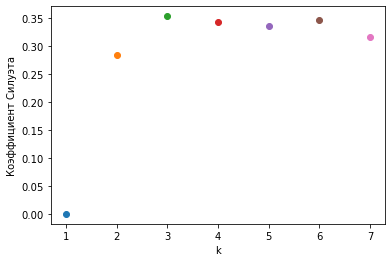

Наиболее оптимальное колличество кластеров = 3


In [153]:
X = normalized_points # your data
sil = []
# Apply the k-means algorithm to the data
for i in range(1,k+1):
    centroids, clusters = k_means(X, i)

    # Compute the Silhouette Coefficients for each sample
    silhouette_coefficients = silhouette_score(X, clusters)
    plt.scatter(i,silhouette_coefficients)
    # Print the Silhouette Coefficients
    #print(silhouette_coefficients)
    sil.append(silhouette_coefficients)
plt.xlabel('k')
plt.ylabel('Коэффициент Силуэта')

# Add a legend
#plt.legend()

# Show the plot
plt.show()
sil2 = []
[sil2.append(i+1) for i in range(1,len(sil)-1) if sil[i]>sil[i-1] and sil[i]>sil[i+1]]
print('Наиболее оптимальное колличество кластеров =', min(sil2))

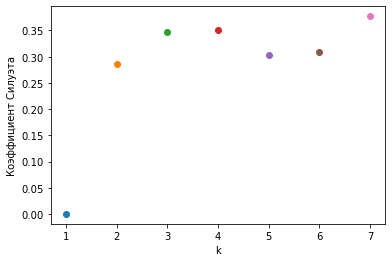

Наиболее оптимальное колличество кластеров = 4


In [156]:
X = normalized_points # your data
sil = []
# Apply the k-means algorithm to the data
for i in range(1,k+1):
    centroids, clusters = k_medians(X, i)

    # Compute the Silhouette Coefficients for each sample
    silhouette_coefficients = silhouette_score(X, clusters)
    plt.scatter(i,silhouette_coefficients)
    # Print the Silhouette Coefficients
    #print(silhouette_coefficients)
    sil.append(silhouette_coefficients)
plt.xlabel('k')
plt.ylabel('Коэффициент Силуэта')

# Add a legend
#plt.legend()

# Show the plot
plt.show()
sil2 = []
[sil2.append(i+1) for i in range(1,len(sil)-1) if sil[i]>sil[i-1] and sil[i]>sil[i+1]]
print('Наиболее оптимальное колличество кластеров =', min(sil2))

Был реализован алгоритм поиска сгущений при различных радиусах 𝑅, отображены полученные кластеры, выделен каждый кластер
разным цветом или маркером, отмечены центроиды. 
Результаты представлены в виде таблицы:


In [180]:
import numpy as np
centroids1, clusters1 = k_medians(normalized_points,4)
#print(clusters1)
centroids1 = []
schet = 0
while len(centroids1)!=4:
    for i in range(len(clusters1)):
        if clusters1[i]==schet:
            centroids1.append(normalized_points[i])
            break
    schet+=1
#print(centroids1)
def cluster_thickening(data,centers, k, t):
    # Initialize the cluster centers as random points from the data
    cluster_centers = centers.copy()
    #print('Centers is:',cluster_centers)
    # Initialize a dictionary to store the points in each cluster
    clusters = {i: [] for i in range(k)}

    # Iterate until convergence
    while True:
    # Assign each point to the closest cluster center
        for point in data:
            distances = [np.linalg.norm(point - center) for center in cluster_centers]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(point)

    # Store the old cluster centers
        old_cluster_centers = cluster_centers

    # Update the cluster centers by taking the average of the points in each cluster
        for i in range(k):
            cluster_centers[i] = np.mean(clusters[i], axis=0)

    # Check for convergence
        if np.allclose(old_cluster_centers, cluster_centers, atol=t):
            break

  # Return the clusters and cluster centers
    return clusters, cluster_centers

# Example usage
data = np.array(normalized_points)

In [181]:
Rmin = min([((normalized_points[i][0]-normalized_points[j][0])**2+(normalized_points[i][1]-normalized_points[j][1])**2)**0.5 for i in range(len(normalized_points)) for j in range(len(normalized_points)) if i!=j])
#print(Rmin)
Rmax = max([((normalized_points[i][0]-normalized_points[j][0])**2+(normalized_points[i][1]-normalized_points[j][1])**2)**0.5 for i in range(len(normalized_points)) for j in range(len(normalized_points)) if i!=j])
#print(Rmax)
R = [(Rmax-Rmin)*i/5+Rmin for i in range(0,6)]

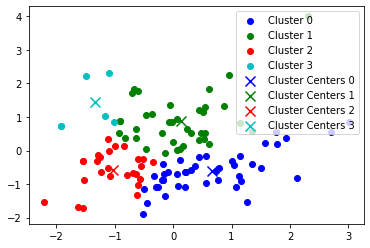

In [182]:
import matplotlib.pyplot as plt
clusters, cluster_centers =0,0
clusters, cluster_centers = cluster_thickening(data,centroids1, k=4, t=Rmin)
#print(cluster_centers)
colors = ['b', 'g', 'r', 'c', 'm','y','k','w']
# Plot the data points
for i in range(4):
    plt.scatter(clusters[i][0][0], clusters[i][0][1],c=colors[i], label=f'Cluster {i}')
    for j in clusters[i]:
        plt.scatter(j[0], j[1],c=colors[i])

# Plot the cluster centers
[plt.scatter(cluster_centers[i][0], cluster_centers[i][1], marker='x', color=colors[i], s=100, label=f'Cluster Centers {i}') for i in range(4)]

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [183]:
import pandas as pd
#R_table = pd.DataFrame({},index=[' '])
R_list = []
for i in range(len(R)):
    #print('R = ',10**(i))
    clusters, cluster_centers = 0,0
    clusters, cluster_centers = cluster_thickening(data,centroids1, k=4, t=R[i])
    #[print(len(clusters[i])) for i in clusters]
    #print(cluster_centers)
    R_list.append([R[i],cluster_centers, [len(clusters[lens]) for lens in clusters]])
    #print()
#print(R_list)
R_table = pd.DataFrame({'Значение R':[R_list[i][0] for i in range(len(R))],
                       'Центроиды кластера $x_{C_i}$':[R_list[i][1] for i in range(len(R))],
                       'Объём кластера #$C_i$':[R_list[i][2] for i in range(len(R))]},index=[' '*i for i in range(len(R))])
R_table

,Значение R,Центроиды кластера $x_{C_i}$,Объём кластера #$C_i$
,0.025328,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,1.451880,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,2.878432,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,4.304984,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,5.731536,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,7.158088,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"


Была проверена чувствительность метода поиска сгущений к погрешностям.

In [184]:
R_list = []
clusters, cluster_centers = 0,0
clusters, cluster_centers = cluster_thickening(data,centroids1, k=4, t=R[1])
R_list.append([0,R[1],cluster_centers, [len(clusters[lens]) for lens in clusters]])
for i in range(5):
    #print('R = ',10**(i))
    clusters, cluster_centers = 0,0
    clusters, cluster_centers = cluster_thickening(data,centroids1, k=4, t=R[1]+10**(-i))
    #[print(len(clusters[i])) for i in clusters]
    #print(cluster_centers)
    R_list.append([10**(-i),R[1]+10**(-i),cluster_centers, [len(clusters[lens]) for lens in clusters]])
    #print()
#print(R_list)
R_table_1 = pd.DataFrame({'Значение $\epsilon$':[R_list[i][0] for i in range(len(R_list))],
                          'Значение R':[R_list[i][1] for i in range(len(R_list))],
                       'Центроиды кластера $x_{C_i}$':[R_list[i][2] for i in range(len(R_list))],
                       'Объём кластера #$C_i$':[R_list[i][3] for i in range(len(R_list))]},index=[' '*i for i in range(len(R_list))])
R_table_1

,Значение $\epsilon$,Значение R,Центроиды кластера $x_{C_i}$,Объём кластера #$C_i$
,0.0000,1.45188,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,1.0000,2.45188,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,0.1000,1.55188,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,0.0100,1.46188,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,0.0010,1.45288,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"
,0.0001,1.45198,"[[0.6600912715611218, -0.6009743838247388], [0...","[42, 37, 25, 5]"


Мощности кластеров не сильно меняются от значения $\epsilon$ => метод не чувствителен к погрешностям порядка от $\frac{1}{10^5}R$ до $R$

При использовании метода силуэтов было определено, что оптимальное количество кластеров=4. По таблице метода поиска сгущений при R, лежащем в промежутке Rmin < R < Rmax видно, что встречается только разделение именно на 4 кластера.

## Выводы

В ходе выполнения практической работы были изучены методы нормализации множества точек, реализованы алгоритмы k-means, k-medians, метод силуэтов. 

Каждый из алгоритмов был прогонен на выборке по параметрам `vodka` и `beer` и на основе полученных данных построены графики и таблицы значений. 

Был реализован алгоритм поиска сгущений при различных радиусах 𝑅. Была проверена чувствительность метода поиска сгущений к погрешностям.